<h1> Gradientenabstiegsverfahren</h1>

<h2>Motivation</h2>

<font size="3" face="Verdana">
<p style="text-align:justify">Beim Gradientenabstiegsverfahren nähert man sich, ausgehend von geschätzten Startparametern, schrittweise dem Optimum an. Dabei geht man immer in die Richtung des steilsten Abstiegs also des negativen Gradienten. Im Gegensatz zum Gauß-Newton Verfahren muss nicht die Pseudo-Inverse der Jakobi-Matrix berechnet werden.</p>
</font>

<h2>Verfahren</h2>

<font size="3" face="Verdana">
<p style="text-align:justify">Bevor das Gradientenabstiegsverfahren angewendet werden kann, muss eine Funktion gefunden werden, die das Verhalten der Kurve bestimmt:</p>
    
\begin{align}
f(p)
\end{align}

<p style="text-align:justify">Daraus lässt sich dann eine Fehlerfunktion bestimmen, die minimiert werden muss um die optimalen Parameter zu finden:</p>

\begin{align}
r = y - f(p) = F(p) = [F_1(p_1,...,p_n),...,F_m(p_1,...,p_n)]^T 
\end{align}

<p style="text-align:justify">$F_1$ bis $F_m$ unterscheiden sich dabei nur in den eingesetzten Messpunkten.</p>

<p style="text-align:justify">Außerdem müssen noch die $n$ Startparameter geschätzt werden:</p>

\begin{align}
p^{(0)} = [p_1^{(0)},...,p_n^{(0)}]
\end{align}

<h4>1. Berechnen der Fehlerfunktion mit den Startparametern: </h4>

<p style="text-align:justify">Im ersten Schritt werden die Werte der Fehlerfunktion mithilfe der geschätzten Startparameter und den $m$ Messpunkten berechnet:</p>

\begin{align}
r = 
\begin{bmatrix} 
       r_{1}   \\
       \dots   \\
       r_{m}   \\
       \end{bmatrix} = 
       \begin{bmatrix} 
       F_{1}(p_1^{(0)},...,p_n^{(0)})   \\
       \dots   \\
       F_{m}(p_1^{(0)},...,p_n^{(0)})   \\
       \end{bmatrix}
\end{align}

<h4>2. Berechnen der Jakobi-Matrix für die Fehlerfunktion:</h4>

<p style="text-align:justify">Dannach wird die Jakobi-Matrix der Fehlerfunktion berechnet.
Dazu werden zuerst die partiellen Ableitungen der Fehlerfunktion nach den Parametern $p_1$ bis $p_n$ gebildet und dann durch Einsetzen der Startparameter und Messpunkte die Einträge der Jakobi-Matrix berechnet.</p>

\begin{align}
       J =
       \begin{bmatrix} 
       \frac{\partial r_{1}}{\partial p_{1}} & \ldots  & \frac{\partial r_{1}}{\partial p_{n}}  \\
       \vdots & \ddots & \vdots  \\
       \frac{\partial r_{m}}{\partial p_{1}} & \ldots & \frac{\partial r_{n}}{\partial p_{n}}  \\
       \end{bmatrix}
\end{align}

<h4>3. Aktualisieren der Parameter</h4>

<p style="text-align:justify">Nun kann mithilfe der Jakobi-Matrix und den Werten der Fehlerfunktion der Kostengradient berechnet werden:</p>
    
\begin{align}
C_{gradient} = J^{T(s)} * r
\end{align}

<p style="text-align:justify">und dann die Parameter aktualisiert werden:</p>

\begin{align}
p^{(s+1)} = p^{(s)} - \gamma * C_{gradient}
\end{align}

<p style="text-align:justify">$\gamma$ gibt hier die Schrittweite an. Es kann konstant gewählt sein, oder in jedem Schritt neu berechnet werden.
Wird $\gamma$ sehr klein gewählt konvergiert das Verfahren nur sehr langsam. Wird es dagegen sehr groß gewählt, kann der Schritt das Optimum überspringen und im schlimmsten Fall divergieren (Siehe Bild 1). Daher sollte $\gamma$ sorgfältig gewählt werden.</p>

<figure>
    <img src="Stepsize.png" style="width:40%">
    <figcaption style="text-align:center"> Bild 2 </figcaption>
</figure>

<p style="text-align:justify">Das $\gamma$ kann zum Beispiel mit der Barzilai-Borwein Methode in jedem Schritt folgendermaßen angepasst werden:</p>

\begin{align}
\gamma_n = \frac{|(p_n-p_{n-1})^T * (C_{gradient, n}-C_{gradient, n-1})|}{\|(C_{gradient, n}-C_{gradient, n-1})\|^2}
\end{align}

<p style="text-align:justify">Diese Möglichkeit ist auch im Code weiter unten implementiert.</p>

<br />
<p style="text-align:justify">Mit den neuen Parametern $p_1,...,p_n$ werden nun die Schritte 1 bis 3 so lange wiederholt bis die Fehlerfunktion klein genug ist, also $\|r\| < \varepsilon$ </p>
</font>

<h2>Beispiel </h2>

<font size="3" face="Verdana">
<p style="text-align:justify">Gegeben sind vier Messpunkte (Tabelle 1), deren Lage duch einen Kreis beschrieben werden kann (siehe Bild 2).</p>

<div class="container">
    
   <div style="float:left;width:30%">
        <table style="width:30%">
          <caption align="bottom">Tabelle 1: Messpunkte</caption>
          <tr>
            <th>x1</th>
            <th>x2</th>
          </tr>
          <tr>
            <td>3</td>
            <td>4</td>
          </tr>
          <tr>
            <td>3.982</td>
            <td>2.279</td>
          </tr>
          <tr>
            <td>5</td>
            <td>6</td>
          </tr>
          <tr>
            <td>6.275</td>
            <td>5.541</td>
          </tr>
        </table>
   </div>
    
   <div style="float:left;width:30%">
        <figure>
            <img src="Kreis.png" style="width:50%">
            <figcaption style="text-align:center"> Bild 2 </figcaption>
        </figure>
   </div>
    
</div>

<p style="text-align:justify">Es sollen die Werte für z1, z2 und R (siehe Bild 3) optimiert werden.</p>

<figure>
    <img src="KreisVariablen.png" style="width:20%">
    <figcaption style="text-align:center"> Bild 3 </figcaption>
</figure>

<p style="text-align:justify">Ein Kreis kann beschrieben werden durch: </p>

\begin{align}
f(x_{1}, x_{2}) = (z_{1} - x_{1})^{2} + (z_{2} - x_{2})^{2} - R^{2}
\end{align}

<p style="text-align:justify">oder in Bezug auf die zu optimierenden Parameter durch:</p>

\begin{align}
f(z_{1}, z_{2}, R) = (z_{1} - x_{1})^{2} + (z_{2} - x_{2})^{2} - R^{2}
\end{align}

<p style="text-align:justify">Weiteres Umformen ergibt die Fehlerfunktion:</p>

\begin{align}
R^{2} = (z_{1} - x_{1})^{2} + (z_{2} - x_{2})^{2}
\end{align}

\begin{align}
R = \sqrt{(z_{1} - x_{1})^{2} + (z_{2} - x_{2})^{2}}
\end{align}

\begin{align}
R = \|z-x\|
\end{align}

\begin{align}
F(z_{1}, z_{2}, R) = R - \|z-x\|
\end{align}

<p style="text-align:justify">Als Startparameter werden die folgenden Werte festgelegt:</p>

\begin{align}
p^{0} = [5.5, 4.3, 1.9]^{T}
\end{align}

<h4>1. Berechnen der Fehlerfunktion mit den Startparametern:</h4>

<p style="text-align:justify">Für jeden der vier Messpunkte wird mithilfe der Startparameter der Wert der Fehlerfunktion berechnet und als Vektor dargestellt:</p>

\begin{align}
r_{i} = (1.9)^{2} - \sqrt{(5.5-x_{i1})^{2} + (4.3-x_{i2})^{2}}
\end{align}

\begin{align}
       F(p^(0)) =
       \begin{bmatrix} 
       r_{1}   \\
       r_{2}   \\
       r_{3}   \\
       r_{4}   \\
       \end{bmatrix} =
       \begin{bmatrix} 
       1.9 - \sqrt{(5.5-3)^{2} + (4.3-4)^{2}}   \\
       1.9 - \sqrt{(5.5-3.982)^{2} + (4.3-2.279)^{2}}   \\
       1.9 - \sqrt{(5.5-5)^{2} + (4.3-6)^{2}}   \\
       1.9 - \sqrt{(5.5-6.275)^{2} + (4.3-5.541)^{2}}   \\
       \end{bmatrix} =
       \begin{bmatrix} 
       -0.61794   \\
       -0.62760   \\
       0.12800   \\
       0.43688   \\
       \end{bmatrix}
\end{align}

<h4>2. Berechnen der Jacobi-Matrix für die Fehlerfunktion:</h4>

<p style="text-align:justify">Mithilfe der Ableitungsregeln:</p>

\begin{align}
f(x) = \sqrt{x} \longrightarrow f'(x) = \frac{1}{2 \sqrt{x}}
\end{align}

\begin{align}
f(x) = g(h(x)) \longrightarrow f'(x) = g'(h(x)) * h*(x)
\end{align}

<p style="text-align:justify">kann die Fehlerfunktion jeweils nach einem der drei Parameter abgeleitet werden:</p>

\begin{align}
\frac{\partial r_{i}}{\partial z_{1}} = - \frac{1}{2 \sqrt{(z_{1}-x_{1})^{2} + (z_{2}-x_{2})^{2}}} * 2(z_{1}-x_{1}) = - \frac{(z_{1}-x_{1})}{\|z-x\|}
\end{align}

\begin{align}
\frac{\partial r_{i}}{\partial z_{2}} = - \frac{(z_{2}-x_{2})}{\|z-x\|}
\end{align}

\begin{align}
\frac{\partial r_{i}}{\partial r} = 1
\end{align}

<p style="text-align:justify">Daraus können dann die Einträge der Jacobi-Matrix berechnet werden:</p>

\begin{align}
       J =
       \begin{bmatrix} 
       \frac{\partial r_{1}}{\partial p_{1}} & \ldots  & \frac{\partial r_{1}}{\partial p_{n}}  \\
       \vdots & \ddots & \vdots  \\
       \frac{\partial r_{m}}{\partial p_{1}} & \ldots & \frac{\partial r_{n}}{\partial p_{n}}  \\
       \end{bmatrix} =
       \begin{bmatrix} 
       \frac{\partial r_{1}}{\partial z_{1}} & \frac{\partial r_{1}}{\partial z_{2}} & \frac{\partial r_{1}}{\partial r}   \\
       \frac{\partial r_{2}}{\partial z_{1}} & \frac{\partial r_{2}}{\partial z_{2}} & \frac{\partial r_{2}}{\partial r}   \\
       \frac{\partial r_{3}}{\partial z_{1}} & \frac{\partial r_{3}}{\partial z_{2}} & \frac{\partial r_{3}}{\partial r}   \\
       \frac{\partial r_{4}}{\partial z_{1}} & \frac{\partial r_{4}}{\partial z_{2}} & \frac{\partial r_{4}}{\partial r}   \\
       \end{bmatrix} = 
       \begin{bmatrix} 
       -\frac{z_1-x_{11}}{\|z-x_1\|} & -\frac{z_2-x_{12}}{\|z-x_2\|} & 1   \\
       -\frac{z_1-x_{21}}{\|z-x_2\|} & -\frac{z_2-x_{22}}{\|z-x_2\|} & 1   \\
       -\frac{z_1-x_{31}}{\|z-x_3\|} & -\frac{z_2-x_{32}}{\|z-x_3\|} & 1   \\
       -\frac{z_1-x_{41}}{\|z-x_4\|} & -\frac{z_2-x_{42}}{\|z-x_4\|} & 1   \\
       \end{bmatrix} = 
       \begin{bmatrix} 
       -\frac{5.5-3}{\sqrt{(5.5-3)^2+(4.3-4)^2}} & -\frac{4.3-4}{\sqrt{(5.5-3)^2+(4.3-4)^2}} & 1   \\
       -\frac{5.5-3.982}{\sqrt{(5.5-3.982)^2+(4.3-2.279)^2}} & -\frac{4.3-2.279}{\sqrt{(5.5-3)^2+(4.3-2.279)^2}} & 1   \\
       -\frac{5.5-5}{\sqrt{(5.5-5)^2+(4.3-6)^2}} & -\frac{4.3-6}{\sqrt{(5.5-5)^2+(4.3-6)^2}} & 1   \\
       -\frac{5.5-6.275}{\sqrt{(5.5-6.275)^2+(4.3-5.541)^2}} & -\frac{4.3-5.541}{\sqrt{(5.5-6.275)^2+(4.3-5.541)^2}} & 1   \\
       \end{bmatrix} =
       \begin{bmatrix} 
       -0.99288 & -0.11915 & 1   \\
       -0.60057 & -0.79957 & 1   \\
       -0.28217 & 0.95937 & 1   \\
       0.52969 & 0.84819 & 1   \\
       \end{bmatrix}
\end{align}

<h4>3. Aktualisieren der Parameter:</h4>

<p style="text-align:justify">Der Schrittweite $\gamma$ wird in diesem Beispiel der Einfachkeit halber ein fester Wert von $0.1$ zugeordnet</p>

<p style="text-align:justify">Mit den Werten der Fehlerfunktion, der Jacobi-Matrix und der Schrittweite $\gamma$ können nun die Parameter aktualisiert werden:</p>

\begin{align}
C_{gradient} = J^{T(s)} * r
\end{align}

\begin{align}
       C_{gradient} =
       \begin{bmatrix} 
       -0.99288 & -0.60057 & -0.28217 & 0.52969   \\
       -0.11915 & -0.79957 & 0.95937 & 0.84819   \\
       1 & 1 & 1 & 1   \\
       \end{bmatrix} 
       \begin{bmatrix} 
       -0.61794    \\
       -0.62760    \\
       0.12800    \\
       0.43688    \\
       \end{bmatrix} =
       \begin{bmatrix} 
       1.18575    \\
       1.06879    \\
       -0.68066    \\
       \end{bmatrix}
\end{align}

\begin{align}
p^{(s+1)} = p^{(s)} - \gamma * C_{gradient}
\end{align}

\begin{align}
       p^{(s+1)} =
       \begin{bmatrix} 
       5.5   \\
       4.3   \\
       1.9   \\
       \end{bmatrix} - 0.1
       \begin{bmatrix} 
       1.18575    \\
       1.06879    \\
       -0.68066    \\
       \end{bmatrix} =
       \begin{bmatrix} 
       5.381427    \\
       4.1926    \\
       1.968066    \\
       \end{bmatrix}
\end{align}

<p style="text-align:justify">Nun wird mit den aktualisierten Parametern wieder bei Schritt 1 begonnen und so lange wiederholt bis die Fehlerfunktion ausreichend klein ist: $\|r\| < \varepsilon$</p>

</font>

<h2> Übungen</h2>

<font size="3" face="Verdana">
<h4>1. Code-Beispiel</h4>
<p style="text-align:justify">Im folgenden befindet sich eine implementierung des Gradientenabstiegsverfahrens.</p>
</font>

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt


# Zielfunktion
def function(p, x):
    return p[2] - math.sqrt((p[0]-x[0])**2 + (p[1]-x[1])**2)
    
    
# Partielle Ableitungen der Zielfunktion
def f_par_deriv_z1(p, x):
    return -(p[0]-x[0]) / math.sqrt((p[0]-x[0])**2 + (p[1]-x[1])**2)

def f_par_deriv_z2(p, x):
    return -(p[1]-x[1]) / math.sqrt((p[0]-x[0])**2 + (p[1]-x[1])**2)

def f_par_deriv_R(p,x):
    return 1

nabla_function = [f_par_deriv_z1, f_par_deriv_z2, f_par_deriv_R]


# Berechnen der Jakobi Matrix
def jacobian(p, points, nabla_f):
    rows = np.shape(points)[0] 
    cols = np.shape(p)[0]
    J = np.zeros((rows,cols))
    for row in range(rows):
        for col in range(cols):
            J[row][col] = nabla_f[col](p, points[row])
    return J


# Berechnen des Residual
def residual(p, points):
    rows = np.shape(points)[0]
    # Residual Vektor initialisieren
    r = np.zeros(rows)
    for row in range(rows):
        r[row] = function(p, points[row])
    return r


# Gradientenabstiegsverfahren mit festem gamma
def Gradientenabstieg_festesGamma(nabla_f, p0, x, gamma):
    # Residual und Parameter initialisieren
    r = residual(p0, x)
    p = p0
    
    # Abbruchbedingungen
    MAX_ITER = 1000
    last_r = r
    MIN_DELTA = 0.000001
    EPSILON = 0.000001
    
    i=0
    while i < MAX_ITER:
        i = i+1
        
        # aktuellen Kreis darstellen
        circle = plt.Circle((p[0], p[1]), radius=p[2], fc='none', ec=[max(0.9-0.05*i, 0), max(0.9-0.05*i, 0), max(0.9-0.05*i, 0)])
        plt.gca().add_patch(circle)
        
        # neue Jakobi Matrix berechnen
        J = jacobian(p, x, nabla_f)
        Jt = np.matrix.transpose(J)
        
        # Parameter aktualisieren
        p = p - gamma*(np.dot(Jt, r))
        
        # Residual aktualisieren
        r = residual(p, x)
        
        #Abbruchbedingungen prüfen
        if np.linalg.norm(r) < EPSILON or np.linalg.norm(r - last_r) < MIN_DELTA:
            break
            
        last_r = r
        
    # Parameter und Anzahl der Iterationen zurückgeben
    ret = [p, i]
    return ret
    
    
# Gradientenabstiegsverfahren mit angepasstem gamma mithilfe der Barzilai-Borwein Methode
def Gradientenabstieg(nabla_f, p0, x, gamma):
    # Residual und Parameter initialisieren
    r = residual(p0, x)
    p = p0
    J = jacobian(p, x, nabla_f)
    Jt = np.matrix.transpose(J)
    c_gradient = np.dot(Jt, r)
    
    # Abbruchbedingungen
    MAX_ITER = 1000
    last_r = r
    MIN_DELTA = 0.000001
    EPSILON = 0.000001
    
    i=0
    while i < MAX_ITER:
        i = i+1
        
        # aktuellen Kreis darstellen
        circle = plt.Circle((p[0], p[1]), radius=p[2], fc='none', ec=[max(0.9-0.05*i, 0), max(0.9-0.05*i, 0), max(0.9-0.05*i, 0)])
        plt.gca().add_patch(circle)

        # Parameter aktualisieren
        last_p = p
        p = p - gamma*c_gradient
        print(gamma)
        # Residual aktualisieren
        r = residual(p, x)
        
        # Jakobi Matrix aktualisieren
        J = jacobian(p, x, nabla_f)
        Jt = np.matrix.transpose(J)
        last_c_gradient = c_gradient
        c_gradient = np.dot(Jt, r)
        
        # Gamma aktualisieren
        delta_p = p - last_p
        delta_c_gradient = c_gradient - last_c_gradient
        norm_delta_c_gradient = np.linalg.norm(delta_c_gradient)
        if norm_delta_c_gradient != 0:
            gamma = np.absolute(np.dot(delta_p, delta_c_gradient)) / norm_delta_c_gradient**2
            
        #Abbruchbedingungen prüfen
        if np.linalg.norm(r) < EPSILON or np.linalg.norm(r - last_r) < MIN_DELTA:
            break
            
        last_r = r
    
    # Parameter und Anzahl der Iterationen zurückgeben
    ret = [p, i]
    return ret
            

# Funktion um verrauschte Messpunkte zu generieren
def getPoints(x, std, R, z_eins, z_zwei):
    for i in range(np.size(x,0)):
        x[i][1] = (- math.sqrt(R**2 - (z_eins - x[i][0])**2) + z_zwei) + np.random.normal(0, std) 
    return x


<font size="3" face="Verdana">
<p style="text-align:justify">Welche Auswirkungen können Sie erkennen, wenn Sie die Startparameter verändern?</p>
<p style="text-align:justify">Wie wirkt sich eine Veränderung der Messpunkte und deren Qualität aus?</p>
<p style="text-align:justify">Was bewirkt eine Änderung der Schrittweite Gamma für das Verfahren mit einem festen Gamma?</p>
<p style="text-align:justify">Wie verändert sich das Ergebnis, wenn das Verfahren ohne festes Gamma verwendet wird?</p>

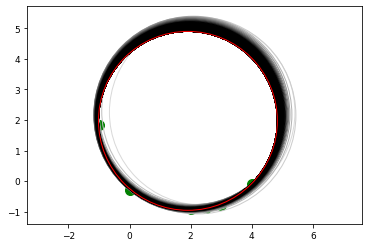

Parameter:
z1:  1.9122505537257344
z2:  1.9721518658963153
R:  2.9282300052564363
Anzahl der Interationen: 223


In [33]:
########################################################################
# Startparameter (z1, z2, R)
p0 = [2.3794, 2.2532, 3.0370]

# Schrittweite
gamma = 0.2

# Messpunkte: x Werte gegeben, y Werte werden mit get Points berechnet und mit einer Gaußschen Normalverteilung verrauscht
#(0 = kein Rauschen)
# getPoionts(Messpunkte, Standardabweichung, Radius, z1, z2)
x = getPoints([[-1, 0], [0, 0], [2, 0], [2.5, 0], [3, 0], [4, 0]], 0.1, 3, 2, 2)
    
# Gradientenabstiegsverfahren anwenden
#festes Gamma:
res = Gradientenabstieg_festesGamma(nabla_function, p0, x, gamma)
#dynamisches Gamma:
#res = Gradientenabstieg(nabla_function, p0, x, gamma)

########################################################################

# Messpunkte anzeigen
for i in range(np.shape(x)[0]):
    plt.scatter(x[i][0], x[i][1], s=100, facecolors='g', edgecolors='g')

# den letzten Kreis in rot darstellen
circle = plt.Circle((res[0][0], res[0][1]), radius=res[0][2], fc='none', ec='r')
plt.gca().add_patch(circle)

# Schaubild anzeigen
plt.tick_params(axis='both', which='major', labelsize=9)
plt.ylim(-10, 10)
plt.xlim(-10, 10)
plt.axis('equal')
plt.show()

# Resultate anzeigen
print("Parameter:")
print("z1: ", res[0][0])
print("z2: ", res[0][1])
print("R: ", res[0][2])
print("Anzahl der Interationen:", res[1])